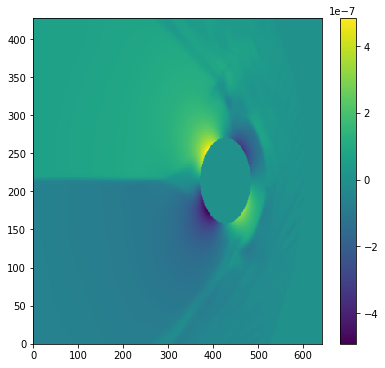

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#data = np.load('../asdf/BCH_1800.npy')
#data = np.load('../asdf/BCQ_1800.npy')
#data = np.load('../asdf/BGD_800.npy')
data = np.load('../asdf/BGF_300.npy')
#print('data shape',data.shape)

fig = plt.figure(figsize=(22, 6))
ax1 = fig.add_subplot(1, 3, 1)
c1 = ax1.pcolor(data[:,:,5])
fig.colorbar(c1, ax=ax1)


In [ ]:
earth = data['rho'] == 0
not_earth = ~earth

features = ['Bx', 'By', 'Bz', 'Ex', 'Ey', 'Ez', 'rho', 'vx', 'vy', 'vz', 'agyrotropy', 'anisotropy']

In [7]:
def standardize(feature):
    avg = np.mean(feature)
    std = np.std(feature)
    return (feature - avg) / std

In [ ]:
data_dict = {}
for feature in features:
    current_feature = data[feature].copy()
    current_feature[not_earth] = standardize(current_feature[not_earth])
    current_feature[earth] = 0
    data_dict[f'{feature}_standardized'] = current_feature

In [7]:
y = data['labeled_domain']

In [8]:
y_i = np.argwhere(y)[:,0]
x_i = np.argwhere(y)[:,1]

In [9]:
def normalize(feature, abs_val=None):
    if abs_val is not None:
        max_val = np.max(abs_val)
    else:
        max_val = np.max(feature)
    return feature / max_val

In [10]:
def euclidian(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

In [11]:
for feature in features:
    abs_E = euclidian(data['Ex'], data['Ey'], data['Ez'])
    abs_B = euclidian(data['Bx'], data['By'], data['Bz'])
    abs_v = euclidian(data['vx'], data['vy'], data['vz'])

    for feature in features:
        current_feature = data[feature].copy()
        if feature.startswith('E'):
            current_feature[not_earth] = normalize(current_feature[not_earth], abs_E[not_earth])
        elif feature.startswith('B'):
            current_feature[not_earth] = normalize(current_feature[not_earth], abs_B[not_earth])
        elif feature.startswith('v'):
            current_feature[not_earth] = normalize(current_feature[not_earth], abs_v[not_earth])
        else:
            current_feature[not_earth] = normalize(current_feature[not_earth])
        current_feature[earth] = 0
        data_dict[f'{feature}_normalized'] = current_feature

In [9]:
data_dict.keys()

dict_keys([])

In [ ]:
for feature in features:
    fig = plt.figure(figsize=(22, 6))

    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)

    
    c1 = ax1.imshow(data[feature])
    ax1.scatter(x_i, y_i, marker='x', color='red')
    ax1.set_title(feature)
    fig.colorbar(c1, ax=ax1)
    
    c2 = ax2.imshow(data_dict[f'{feature}_standardized'])
    ax2.scatter(x_i, y_i, marker='x', color='red')
    ax2.set_title(f'{feature} standardized')
    fig.colorbar(c2, ax=ax2)
    
    c3 = ax3.imshow(data_dict[f'{feature}_normalized'])
    ax3.scatter(x_i, y_i, marker='x', color='red')
    ax3.set_title(f'{feature} normalized')
    fig.colorbar(c3, ax=ax3)
    
    plt.show()

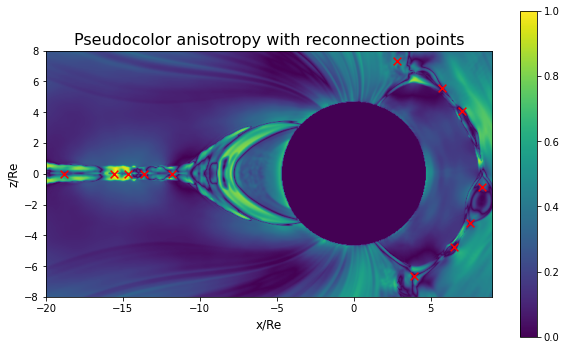

In [14]:
fig = plt.figure(figsize=(10, 6))

xx = np.linspace(xmin, xmax, (data['anisotropy'].shape[1]))
zz = np.linspace(zmin, zmax, (data['anisotropy'].shape[0]))

labeled_indices = y.nonzero()
labeled_z = zz[labeled_indices[0]]
labeled_x = xx[labeled_indices[1]]

ax = fig.add_subplot()

c = ax.imshow(data_dict['anisotropy_normalized'], extent=[xmin, xmax, zmin, zmax])
ax.scatter(labeled_x, labeled_z, marker='x', color='red', s=60)
ax.set_title('Pseudocolor anisotropy with reconnection points', fontsize=16)
ax.set_xlabel('x/Re', fontsize=12)
ax.set_ylabel('z/Re', fontsize=12)
fig.colorbar(c, ax=ax)

fig.savefig('reconnection_points.png', bbox_inches='tight')
plt.show()

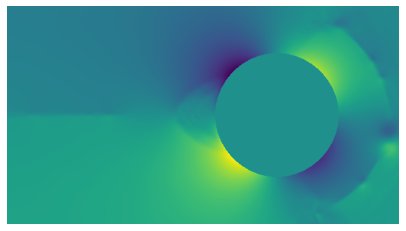

In [ ]:
for feature in features:
    fig = plt.figure(figsize=(8, 4))

    ax = fig.add_subplot()
    
    ax.imshow(data_dict[f'{feature}_normalized'])
    
    plt.axis('off')
    fig.savefig(f'{feature}.png', bbox_inches='tight')
    plt.show()